<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/master/Big_Mart_Sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_path="/content/train.csv"
test_path="/content/test.csv"
X_train=pd.read_csv(train_path)
y_test=pd.read_csv(test_path)
X_train['Set']='Train'
y_test['Set']='Test'

In [0]:
data=pd.concat([X_train,y_test])

In [328]:
data.shape

(14204, 13)

In [329]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Set                             0
dtype: int64

In [330]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [331]:
X_train[X_train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,Train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,Train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,Train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490,Train
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150,Train
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120,Train
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,Train


In [332]:
X_train.shape

(8523, 13)

In [333]:
X_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Set                           object
dtype: object

In [517]:
X_train[X_train['Item_Outlet_Sales']<0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set


In [0]:
category=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
numeric=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

In [365]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [0]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('LF','Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('low fat','Low Fat')

data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg','Regular')



In [367]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [368]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [369]:
data['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [406]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [371]:
data['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [372]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [373]:
data[numeric].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [374]:
data[category].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [345]:
data.isnull().sum()/8523*100

Item_Identifier               0.000000
Item_Weight                  28.616684
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  47.119559
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            66.654934
Set                           0.000000
dtype: float64

In [375]:
data[X_train['Outlet_Identifier']=='OUT010'].isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Item_Identifier                0
Item_Weight                   66
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  650
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales            367
Set                            0
dtype: int64

In [347]:
X_train[X_train['Outlet_Identifier']=='OUT045'].isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  929
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Set                            0
dtype: int64

In [348]:
X_train[X_train['Outlet_Identifier']=='OUT017'].isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  926
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Set                            0
dtype: int64

In [349]:
X_train[X_train['Outlet_Identifier']=='OUT017']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,Train
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,Train
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704,Train
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656,Train
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,NaN,Tier 2,Supermarket Type1,2285.0256,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,FDP21,7.420,Regular,0.025886,Snack Foods,189.1872,OUT017,2007,NaN,Tier 2,Supermarket Type1,4727.1800,Train
8494,NCI54,15.200,Low Fat,0.000000,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680,Train
8496,FDJ57,7.420,Regular,0.021696,Seafood,185.3582,OUT017,2007,NaN,Tier 2,Supermarket Type1,3715.1640,Train
8500,NCQ42,20.350,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170,Train


In [350]:
X_train.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type',]).groups

{('OUT010',
  nan,
  'Tier 3',
  'Grocery Store'): Int64Index([   3,   28,   30,   45,   65,   90,  122,  133,  139,  174,
             ...
             8318, 8336, 8365, 8371, 8399, 8400, 8432, 8473, 8486, 8509],
            dtype='int64', length=555),
 ('OUT013',
  'High',
  'Tier 3',
  'Supermarket Type1'): Int64Index([   4,    6,   14,   20,   27,   41,   44,   51,   52,   71,
             ...
             8394, 8409, 8416, 8430, 8438, 8462, 8466, 8484, 8512, 8518],
            dtype='int64', length=932),
 ('OUT017',
  nan,
  'Tier 2',
  'Supermarket Type1'): Int64Index([   9,   25,   53,   54,   73,   78,   85,  111,  116,  118,
             ...
             8447, 8452, 8455, 8471, 8477, 8493, 8494, 8496, 8500, 8501],
            dtype='int64', length=926),
 ('OUT018',
  'Medium',
  'Tier 3',
  'Supermarket Type2'): Int64Index([   1,    5,   16,   31,   32,   37,   43,   55,   60,   82,
             ...
             8482, 8489, 8491, 8498, 8505, 8506, 8511, 8515, 8516, 8521],
    

In [0]:
X_weights=data.loc[:,['Item_Identifier','Item_Weight']]
X_weights=X_weights.drop_duplicates()

In [0]:
X_weights.dropna(inplace=True)

In [378]:
X_weights.head()

,Item_Identifier,Item_Weight
0,FDA15,9.30
1,DRC01,5.92
2,FDN15,17.50
3,FDX07,19.20
4,NCD19,8.93


In [0]:
new_df=pd.merge(data, X_weights, on='Item_Identifier')

In [380]:
new_df.head()

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set,Item_Weight_y
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,9.3
1,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,Train,9.3
2,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,Train,9.3
3,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,Train,9.3
4,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,Train,9.3


In [381]:
new_df.isnull().sum()

Item_Identifier                 0
Item_Weight_x                2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Set                             0
Item_Weight_y                   0
dtype: int64

In [0]:
new_df.drop(columns=['Item_Weight_x'],axis=1,inplace=True)

In [0]:
new_df.rename(columns={'Item_Weight_y':'Item_Weight'},inplace=True)

In [0]:
X_outlet=data.loc[:,['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [385]:
X_outlet.isnull().sum()

Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [0]:
X_outlet.dropna(inplace=True)

In [297]:
X_train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [299]:
X_outlet['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT013', 'OUT027', 'OUT046', 'OUT035',
       'OUT019'], dtype=object)

In [313]:
new_df[new_df['Item_Identifier']=='DRI11']

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set,Item_Weight
156,DRI11,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,Train,8.26
157,DRI11,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502,Train,8.26
158,DRI11,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012,Train,8.26
159,DRI11,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834,Train,8.26
160,DRI11,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012,Train,8.26
161,DRI11,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174,Train,8.26
162,DRI11,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676,Train,8.26
163,DRI11,Low Fat,0.034404,Hard Drinks,113.5834,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test,8.26
164,DRI11,Low Fat,0.034376,Hard Drinks,115.3834,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,Test,8.26
165,DRI11,Low Fat,0.034599,Hard Drinks,115.9834,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test,8.26


In [387]:
new_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [0]:
ITC_data=pd.get_dummies(new_df['Item_Fat_Content'])
IT_data=pd.get_dummies(new_df['Item_Type'])

In [0]:
df=pd.concat([new_df,ITC_data,IT_data],axis='columns')

In [390]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set,Item_Weight,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,9.3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,FDA15,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,Train,9.3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,FDA15,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,Train,9.3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,FDA15,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,Train,9.3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,FDA15,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,Train,9.3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Regular','Others'],axis=1,inplace=True)

In [404]:
df.head()

,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Set,Item_Weight,Low Fat,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.016047,249.8092,1,3735.1380,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.016055,250.2092,3,5976.2208,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.016019,248.5092,2,6474.2392,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.016088,249.6092,1,5976.2208,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.026818,248.9092,3,498.0184,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
df['Outlet_Size']=df['Outlet_Size'].replace(np.nan,'unknown')

In [416]:
df['Outlet_Size'].value_counts()

1.0        4655
unknown    4016
2.0        3980
0.0        1553
Name: Outlet_Size, dtype: int64

In [415]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [0]:
df['Outlet_Size']=df['Outlet_Size'].replace(3,np.nan)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [0]:
df.drop(['Outlet_Size'],axis=1,inplace=True)

In [422]:
df.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Set,Item_Weight,Low Fat,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.016047,249.8092,3735.1380,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.016055,250.2092,5976.2208,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.016019,248.5092,6474.2392,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.016088,249.6092,5976.2208,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.026818,248.9092,498.0184,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
X=df[df['Set'] =='Train']
X_test=df[df['Set']=='Test']

In [0]:
y=X['Item_Outlet_Sales'].values

In [456]:
y

array([3735.138 , 5976.2208, 6474.2392, ..., 2848.9582, 2787.0388,
       3644.5892])

In [477]:
X.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Set,Item_Weight,Low Fat,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.016047,249.8092,3735.1380,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.016055,250.2092,5976.2208,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.016019,248.5092,6474.2392,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.016088,249.6092,5976.2208,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.026818,248.9092,498.0184,Train,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [478]:
X.columns

Index(['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Set',
       'Item_Weight', 'Low Fat', 'Baking Goods', 'Breads', 'Breakfast',
       'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')

In [0]:
X=X.loc[:,['Item_Visibility', 'Item_MRP','Item_Weight', 'Low Fat', 'Baking Goods', 'Breads', 'Breakfast','Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables','Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Seafood','Snack Foods', 'Soft Drinks', 'Starchy Foods']]
X_test=X_test.loc[:,['Item_Visibility', 'Item_MRP','Item_Weight', 'Low Fat', 'Baking Goods', 'Breads', 'Breakfast','Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables','Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Seafood','Snack Foods', 'Soft Drinks', 'Starchy Foods']]

In [481]:
X.head()

,Item_Visibility,Item_MRP,Item_Weight,Low Fat,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.016047,249.8092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.016055,250.2092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.016019,248.5092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.016088,249.6092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.026818,248.9092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [510]:
X.shape

(8523, 19)

In [511]:
X_test.shape

(5681, 19)

In [482]:
X_test.head()

,Item_Visibility,Item_MRP,Item_Weight,Low Fat,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.016047,249.8092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.016055,250.2092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.016019,248.5092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.016088,249.6092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.026818,248.9092,9.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


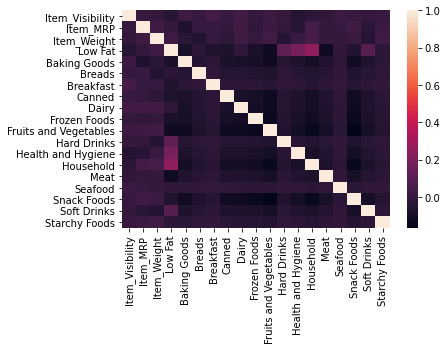

In [483]:
sns.heatmap(X.corr())

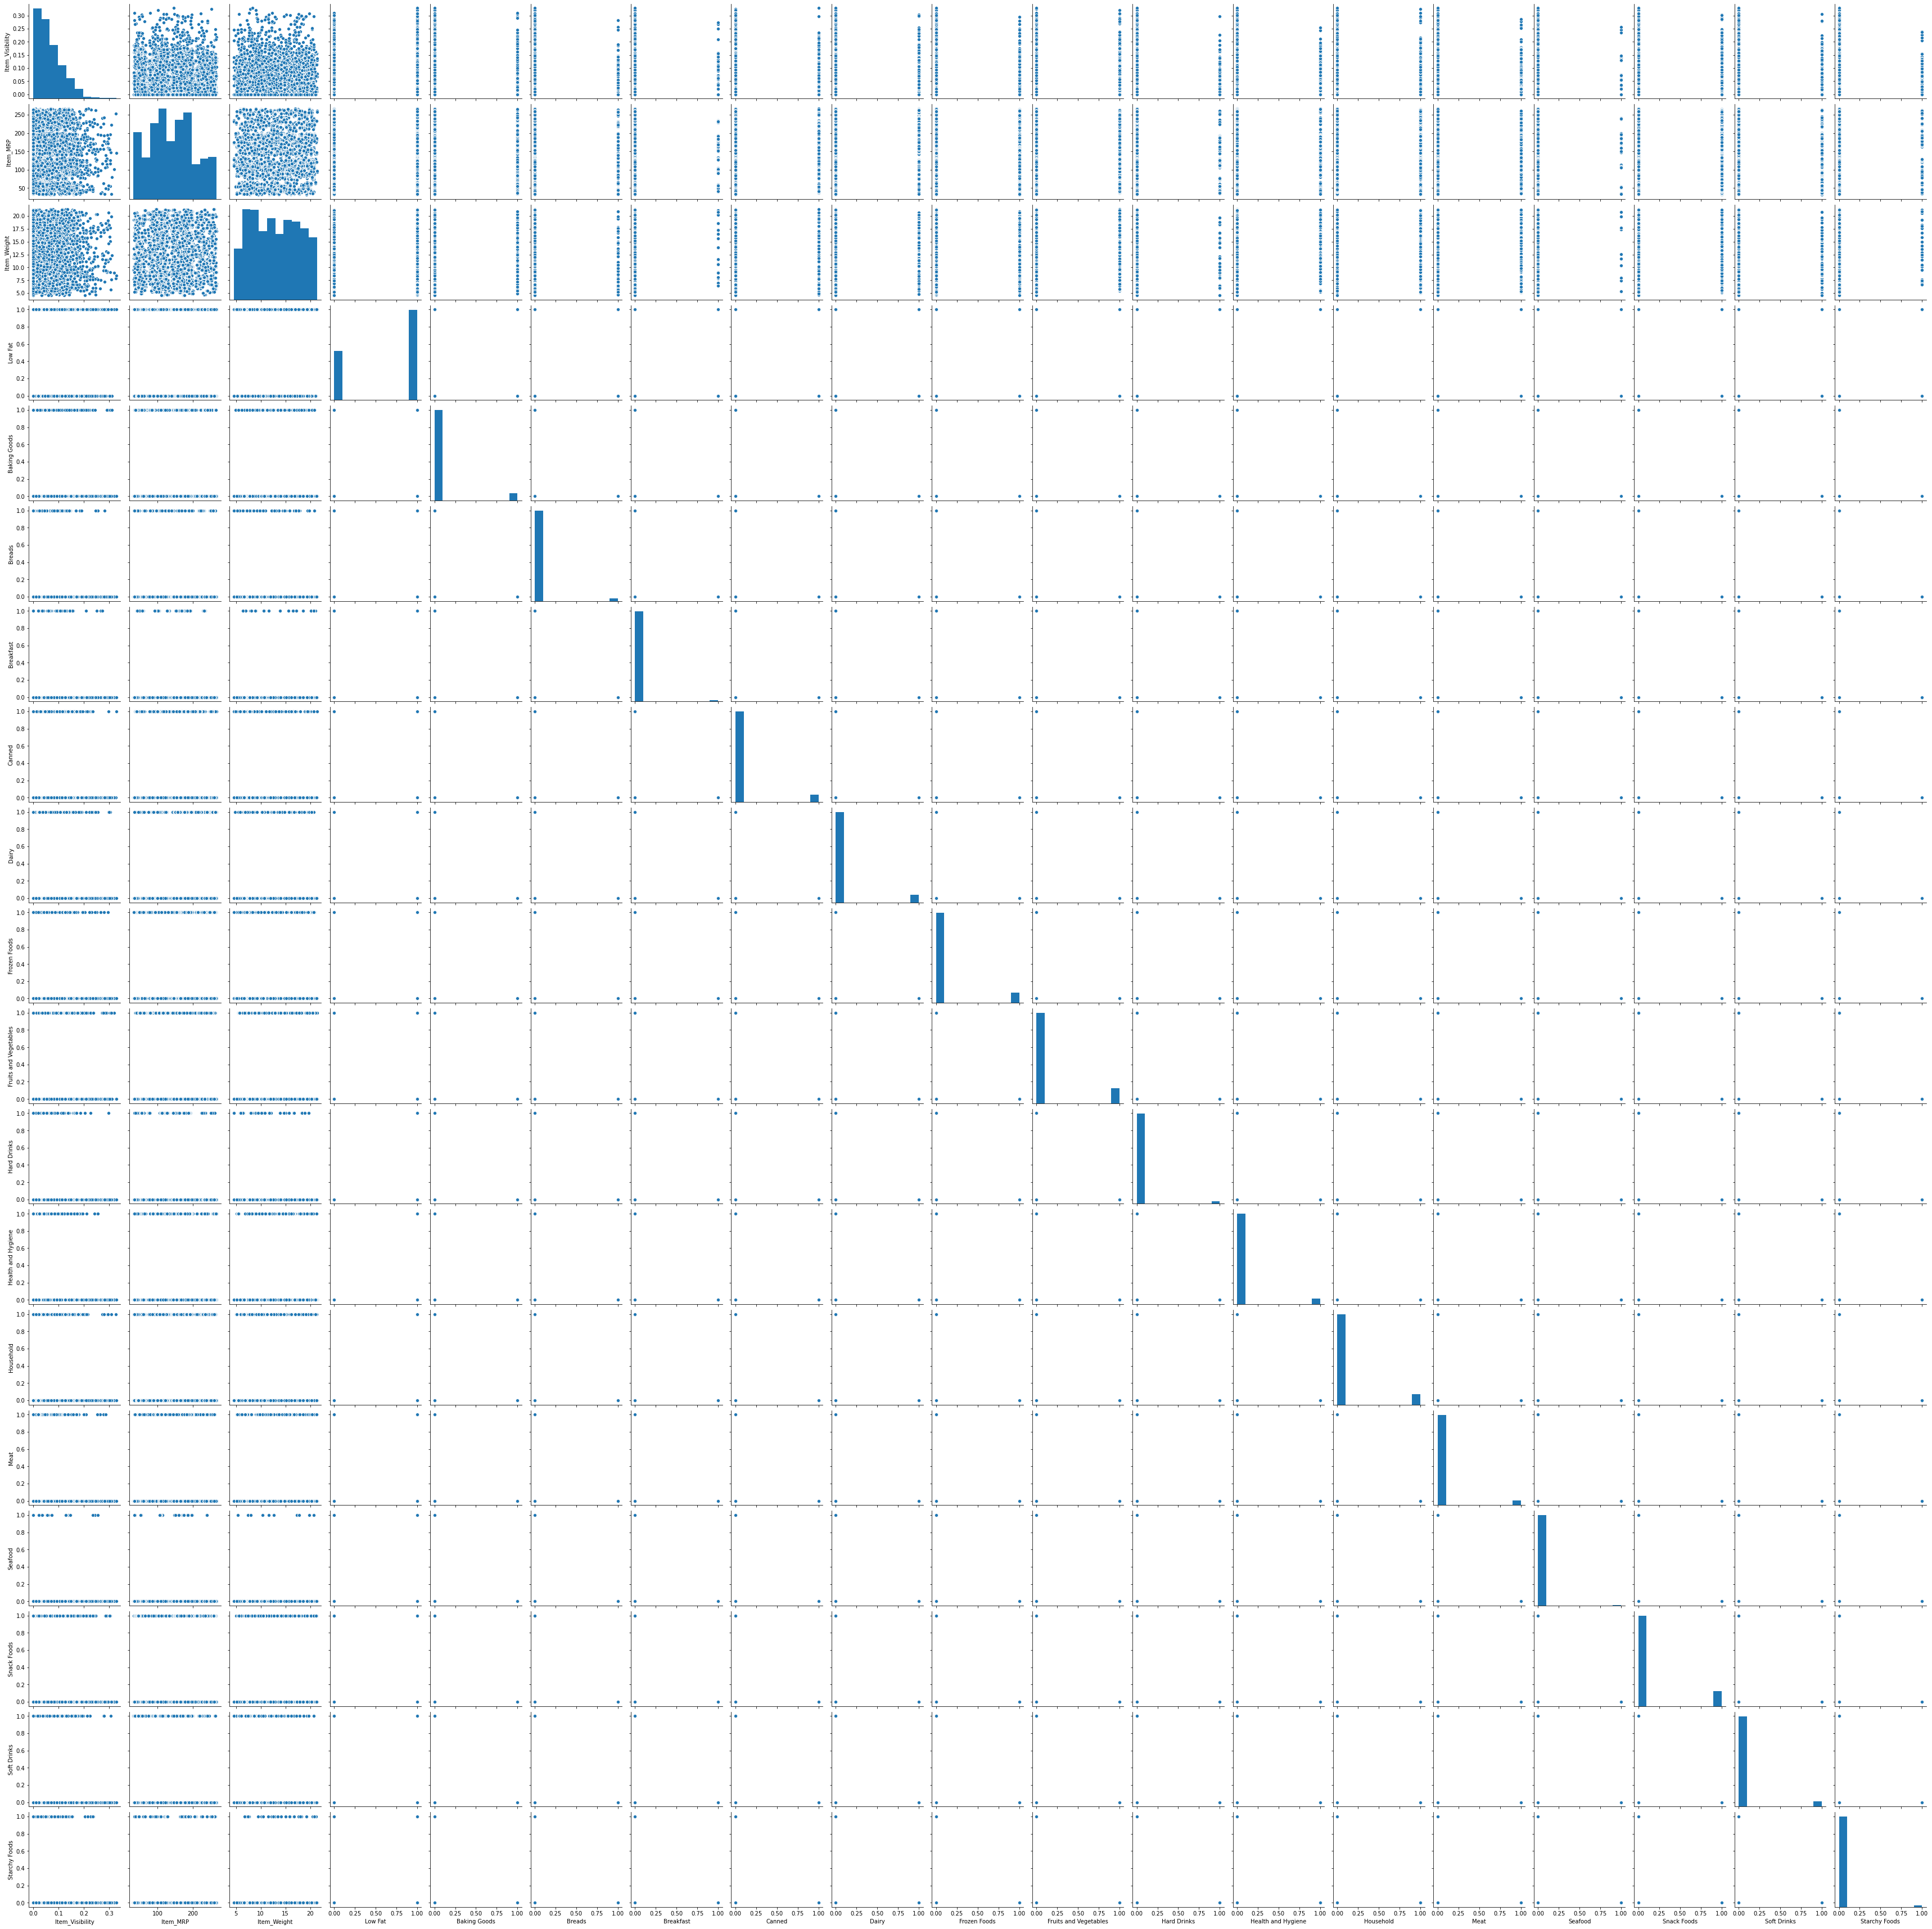

In [443]:
sns.pairplot(X)

In [0]:
from sklearn.linear_model import LinearRegression

In [512]:
le_model=LinearRegression()
le_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=le_model.predict(X_test)
y_df=pd.DataFrame(y_pred)

In [0]:
y_df.to_csv('new.csv')

In [0]:
for i in range(len(y_pred)):
  print(y_pred[i])

In [0]:
import csv

In [497]:
with open('/content/sample_submission.csv', "a", newline='') as f:
    writer = csv.DictWriter(f,fieldnames='Item_Outlet_Sales')
    for i in range(len(y_pred)):
      writer.writerow(y_pred[i])

AttributeError: ignored